# main c1b code
This the main code that we are going to test here. Write your comments as soon as encouter the problem. Use markdown cell to insert your comments.  

In [2]:
%matplotlib inline
import c1b_util1 as c1b
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

#position of the window for the laptop
#not neccessary, but we keep it because another function is using it
pos = [480, 40, 1090, 800]
secyr = 86400*365;      # seconds per year 
f = 0.8                 # implicit/explicit factor 
jflag = 1               # 1 (plot J), 2 (plot Jnet)

# TEST: enter all 0 cases
experm = c1b.set_experim(); 
print 'exp=',experm
region = experm[0]; project = experm[1]; experim = experm[2]
print region, project,experim

Regions:
[0] test
[1] alaska
Type region#: 0
test
--------------------
Projects: 
[0] easy
[1] rock
[2] ice
Type project#: 0
easy
----------
Experiments =
[0] e1 SS, UB = fixed Ts, LB = fixed Jb, source=0
[1] e2 SS with exponential source term
[2] e3 SS with composite material
[3] e4 SS with temp.-dependent K and Cp
[4] e5 instantaneous step change
[5] e6 periodic surface temp
[6] e7 triangle heating pulse
Type experiment#: 0
('test', 'easy', 'e1')
exp= ('test', 'easy', 'e1')
test easy e1


next we skip the lines 78-83 in the Gary's code. Make sure to corresct this function in the utils file. Assign 'return experiment'.

In [5]:
experm_file ='projects/'+region+'/'+project+'/'+experim+'/'+experim+'_namelist.txt'
fid = open(experm_file,'r')
header = fid.readline()
blank = fid.readline()
Lname_s = fid.readline()
Tsname_s = fid.readline()
Pname_s = fid.readline()
Sname_s = fid.readline()
fid.close()
#print header, blank, Lname_s, Tsname_s, Pname_s, Sname_s

Lname = c1b.extract_str(Lname_s) #  physical-layers file
Tsname = c1b.extract_str(Tsname_s) #  Ts-history file
Pname = c1b.extract_str(Pname_s) # thermal property m-file
Sname = c1b.extract_str(Sname_s) #  source m-file
print Lname, Tsname, Pname, Sname

lib_file = 'projects/'+region+'/library/layers/'+Lname+'.txt' 
print '\nReading the entire file at once ignoring commented lines.'
wk = np.loadtxt(lib_file, comments='%', delimiter=',', unpack=False)
print wk
zfuL = wk[:,0]          # upper boundary of this physical layer
zfdL = wk[:,1]          # lower boundary of this physical layer
typL = wk[:,2]          # type of material for this layer
nL   = wk[:,3]          # number of control volumes for this layer

print zfuL

e1_layer Ts_1 Tprop_1 source_1

Reading the entire file at once ignoring commented lines.
[[  0.    1.    1.    1.5]
 [  1.    5.    1.    4. ]
 [  5.   10.    1.    2. ]
 [ 10.   20.    1.    2. ]]
[  0.   1.   5.  10.]


I am not sure what N should be equal too. **Gary did not pass n=4 to the function. It outputs N.** Need to check why. See Z_grid. There is a bug in Z_grid. Currently does not work. 
**Brielle, we need to check why zfuL that we are getting is different from maltlab. Also big N is somehow calculated in the Z_grid, nooed to check that too.**

In [6]:
print 'input'
print zfuL, zfdL, typL, nL
[zf,z,Dz,dz,varep,typ,N]=c1b.Z_grid(4,zfuL, zfdL, typL, nL, pos)
zz = z[1:N]
spaceP = [zf,z,Dz,dz,varep];
#print spaceP
print 'output'
print zf,z,Dz
print ''
print dz,varep,typ
print N

input
[  0.   1.   5.  10.] [  1.   5.  10.  20.] [ 1.  1.  1.  1.] [ 1.5  4.   2.   2. ]
output
[  0.    0.2   0.6   1.    2.6   4.2   7.    9.   14.   18. ] [  0.    0.4   0.8   1.8   3.4   5.6   8.   11.5  16.   18. ] [ 0.2  0.4  0.4  1.6  1.6  2.8  2.   5.   4. ]

[  1.00000000e-09   4.00000000e-01   4.00000000e-01   1.00000000e+00
   1.60000000e+00   2.20000000e+00   2.40000000e+00   3.50000000e+00
   4.50000000e+00] [ 0.          0.5         0.5         0.8         0.5         0.63636364
  0.41666667  0.71428571  0.44444444] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
9


In [17]:
#typ = np.zeros(10)
nlayers = len(typL)
print nlayers,nL

#nL = np.ones(n) + 1.5  
    
if nL[0]%1 != 0.5:
    print(' ') 
    print('Error: Z_grid.m') 
    print('Upper physical layer needs to include a 1/2-CV.  Thus, nL(1) ') 
    print('should be a number like 1.5, 2.5, 4.5, etc.')
j = 1 
Dz = (zfdL[0] - zfuL[0]) / nL[0]                 
zf = [zfuL[0], zfuL[0] + 0.5*Dz]                 
zfx = np.arange(zf[1] + Dz, zfdL[0]+Dz, Dz)      
zf = zf = np.concatenate((zf, zfx))           
n = len(zf) - 1       
print Dz, zf

4 [ 1.5  4.   2.   2. ]
0.666666666667 [ 0.          0.33333333  1.        ]


Note: lines 124-172 in matlab. Here loadtxt removes the neccessity of using extract_num and combined two switch statements into one. 

In [4]:
print project
param_file = 'projects/'+region+'/'+project+'/'+experim+'_param.txt'

if region == 'alaska':
    # Note that I have not check this case
    wk = np.loadtxt(param_file, comments='%', delimiter=',', unpack=False)
    imat0= wk[0]; matfrac0 = wk[1]; Kg25 = wk[2]; 
    phi0 = wk[3]; qb0 = wk[4]
    print wk
    testP = [];
    print testP
    
    imat = imat0*np.ones(N-1)
    matfrac = matfrac0*np.ones(N-1)
    phi = phi0*np.ones(N-1)
    Mw0 = float('nan')*np.ones(N-1)
    materialC = [imat,matfrac,Kg25,phi,Mw0]
    print materialC
    
elif region == 'test':
    wk = np.loadtxt(param_file, comments='%', delimiter=',', unpack=False)
    T0= wk[0]; dT = wk[1]; period = wk[2]; qb0 = wk[3]
    print wk
    testP = [experim, T0,dT,period];
    print testP
    materialC = [typ]
    print materialC
else:
    testP = [];

easy
[-10.   0.   0.  50.]
['e1', -10.0, 0.0, 0.0]
[array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.])]


**Assigment for Brielle.** Need to read Tsmethod from file

In [5]:
init_file = 'projects/'+region+'/Ts/'+Tsname+'.txt'
#print Tsname
wk = np.loadtxt(init_file, skiprows=4,unpack=False)
print wk
Tsmethod = 'linear' # Note: need to read this from file
tauA = wk[:,0]
tsA = wk[:,1]
print tauA,tsA

[[  0. -10.]
 [  5. -10.]
 [ 10. -10.]]
[  0.   5.  10.] [-10. -10. -10.]


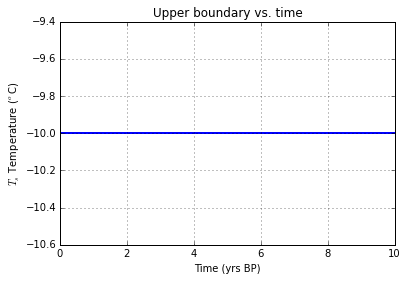

In [7]:
myplot=plt.plot(tauA,tsA); 
plt.xlabel('Time (yrs BP)')
plt.ylabel('$T_s$ Temperature ($^o$C)')
plt.title('Upper boundary vs. time')
plt.setp(myplot, 'color', 'b', 'linewidth', 2.0)
plt.grid(); plt.show()

In [8]:
# set lower boundary condition, qb(tau)

tauB = tauA                       # time BP (yrs)
qbB = -qb0/1000*np.ones(tauB.size); # convert to W/m^2 and change to CV sign convention
qbmethod = 'nearest';                  # interpolation method

# > Set initial conditions -----------
# set initial time (tau0) to oldest age found in upper BC file

tau0 = max(tauA); t = 0;
# find BCs at tau0

Ts_func = interpolate.interp1d(tauA,tsA,qbmethod)
Ts = Ts_func(tau0)
qb_func = interpolate.interp1d(tauB,qbB,qbmethod);
qb = qb_func(tau0)
bcP = [Ts,qb];
print bcP
print Sname,spaceP,t

[array(-10.0), array(-0.05)]
source_1 [array([  0. ,   0.2,   0.6,   1. ,   2.6,   4.2,   7. ,   9. ,  14. ,  18. ]), array([  0. ,   0.4,   0.8,   1.8,   3.4,   5.6,   8. ,  11.5,  16. ,  18. ]), array([ 0.2,  0.4,  0.4,  1.6,  1.6,  2.8,  2. ,  5. ,  4. ]), array([  1.00000000e-09,   4.00000000e-01,   4.00000000e-01,
         1.00000000e+00,   1.60000000e+00,   2.20000000e+00,
         2.40000000e+00,   3.50000000e+00,   4.50000000e+00]), array([ 0.        ,  0.5       ,  0.5       ,  0.8       ,  0.5       ,
        0.63636364,  0.41666667,  0.71428571,  0.44444444])] 0


**Note:** Tprop_1 requires three inputs (currently it has only materialC as an input). Also there was a bug in the K_eff with parentathesis

In [9]:
# find source term for each CV; calling sorce_* function
[QS, Sfrac,sourceP] = c1b.feval(Sname, N,spaceP,t)
print [QS, Sfrac,sourceP] 

# find 1st-guess thermal properties at grid points
spinup = 1;
T = Ts*np.ones(N);     # (assume T = Ts for entire profile)
# calling Tprop_1 function 
[K,rho,Cp,C,diagC] = c1b.feval(Pname,T,materialC,spinup);
print [K,rho,Cp,C,diagC]

# find effective conductivity at interfaces (except bottom interface)
Ke = c1b.K_eff(N,K,varep);

# store thermal properties in cell array TpropP

TpropP = [K,rho,Cp,Ke];
print 'TpropP =',TpropP

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]), [0]]
idx= 1.0
[array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]), array([ 2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.]), array([ 1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.]), array([ 2000000.,  2000000.,  2000000.,  2000000.,  2000000.,  2000000.,
        2000000.,  2000000.,  2000000.,  2000000.]), [array([ 1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.])]]
TpropP = [array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]), array([ 2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.]), array([ 1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.]), array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.])]


In [9]:
print '\nSelect how the initial T-field will be established:' 
print '   [1] input from file '
print '   [2] numerical calculation assuming steady-state conditions'
print '   [3] analytic calculation (note: works only for 3)'
init_opt = input('  Type [1,2 or 3]: ')

T = c1b.init_T(N,t,spaceP,TpropP,QS,sourceP,bcP,testP,init_opt);

print T


Select how the initial T-field will be established:
   [1] input from file 
   [2] numerical calculation assuming steady-state conditions
   [3] analytic calculation (note: works only for 3)
  Type [1,2 or 3]: 3
e1
-10.0 [  0.    0.4   0.8   1.8   3.4   5.6   8.   11.5  16.   18. ] 0.05 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
[-10.      -9.99    -9.98    -9.955   -9.915   -9.86    -9.8     -9.7125
  -9.6     -9.55  ]


In [34]:
init_opt=1
T = np.zeros(N); secyr = 86400*365

z = spaceP[1]; Dz = spaceP[2]; dz = spaceP[3]; 
#NOTE: we cannot do zn = z[0:N], bc we end with N-1 element
zn = z # grid points without the one embedded in lowest interface

K = TpropP[0]; rho = TpropP[1]; cp = TpropP[2]; Ke = TpropP[3]
diffu = K/(rho*cp)

Ts = bcP[0]; Jb = bcP[1]; qb = -Jb
print init_opt     

if init_opt == 1:
    print ''
    Tzname = raw_input('Enter a filename: ') or 'default_T_init.txt'
    try:
        with open(Tzname) as file:
            pass
    except IOError as e:
        print 'Unable to open', Tzname, 'file'
 
    # First 3 rows of Tzname file has to be headers
    wk = np.loadtxt(Tzname, skiprows=3,unpack=False)
    print wk
    zA = wk[:,0]   # depth (m)
    TzA = wk[:,1]  # T(z)

elif init_opt == 2:
    J = np.zeros(N+1)
    J[N] = -qb
    print N+1, J
    for i in range(N-1,-1,-1):
        J[i]=J[i+1] - QS[i] # NOTE: there is a bug a Gary's code it says QS is an empty matrix
        print J[i]
             
    Kedz = Ke/dz # if this is zero then we are going to encounter div by 0 later
    T[0] = Ts
    print Ke, Kedz
    for i in range(1,N):
        T[i] = T[i-1] - J[i]/Kedz[i]

elif init_opt == 3:
        
    experim = testP[0]
    T0 = testP[1]
    dT = testP[2]
    period = testP[3]
    print experim

    if experim == 'e1':
        print T0, zn, qb,K
        T = T0 + zn * qb / K 
    
    elif experim == 'e2':
        #S0 = sourceP[0]; h = sourceP[1]
        #T = T0 + (S0/K) * (h**2) * (1- (np.exp(np.negative(zn[:])/h)))
        print 'This part does not work, bc of sourceP = [0], has to have more than 1 element'
        
    elif experim == 'e3':
        Tf = np.zeros(N+1)
        Tf[0] = T0
        for k in range(0,N):
            Tf[k+1] = Tf[k] + Dz[k] * qb/K[k]
        T[0] - Tf[0]
        for k in range(1,N):
            T[k] = 0.5*(Tf[k] + Tf[k+1])
        
    elif experim == 'e4':
        K0 = 2
        dKdT = -0.0140
        T[0] = T0
        for k in range(1,N):
            C = -(2*K0*T[k-1] + dKdT*T[k-1]**2 + 2*qb*dz[k])
            T[k] = (-K0 + np.sqrt(K0**2 - dKdT*C))/dKdT
    
    elif experim == 'e5':
        T = T0 + zn * (qb/K)
        
    elif experim == 'e6':
        lambda_ = secyr*period # period =0, getting div 0 on the next line
        w = 2*np.pi/lambda_
        k = np.sqrt(np.pi/(lambda_*diffu))
        T = T0 + dT * np.cos(k*zn - w*t + np.pi/2) * np.exp(-k*zn)
    
    elif experim == 'e7':
        T = T0 + zn * qb / K
    
    else:
        import sys
        sys.exit("init_T: sorry no analytic soln available when itest = 0")
            
print T

1

Enter a filename: fsdff



TypeError: exit expected at most 1 arguments, got 3

T = T0 + zn * (qb/K[:]) 

In [32]:
Tzname = raw_input('Enter a filename: ') or 'default_T_init.txt'
try:
    with open(Tzname) as file:
        pass
except IOError as e:
    print 'Unable to open', Tzname, 'file'

Enter a filename: retgerteg
Unable to open retgerteg file


In [27]:
filename = raw_input('Enter a filename: ') or 'default_file.asm'

Enter a filename: dssdfsdf
